## Tests of code for plotting probability distributions and density matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Define pandas dataframe for a probability distribution

In [2]:
states = ['Apple', 'Strawberry','Coconut']
pd_df = pd.DataFrame(np.array([.1, .3, .6]), index = states)
pd_df

,0
Apple,0.1
Strawberry,0.3
Coconut,0.6


Define pandas dataframe for a density matrix

In [3]:
z01 = 2+1j*1
z02 = .3-1j*.2
z12 = .4+1j*.7
z01c, z02c, z12c = np.conjugate([z01, z02, z12])
rho_arr = np.array([[.2, z01, z02],
                    [z01c, .3, z12],
                    [z02c, z12c, .5]])
rho_arr

array([[ 0.2+0.j ,  2.0+1.j ,  0.3-0.2j],
       [ 2.0-1.j ,  0.3+0.j ,  0.4+0.7j],
       [ 0.3+0.2j,  0.4-0.7j,  0.5+0.j ]])

In [4]:
states = ['Apple', 'Strawberry','Coconut']
rho_df = pd.DataFrame(rho_arr, columns = states, index = states)
rho_df

,Apple,Strawberry,Coconut
Apple,(0.2+0j),(2+1j),(0.3-0.2j)
Strawberry,(2-1j),(0.3+0j),(0.4+0.7j)
Coconut,(0.3+0.2j),(0.4-0.7j),(0.5+0j)


Plot multiple probability distributions

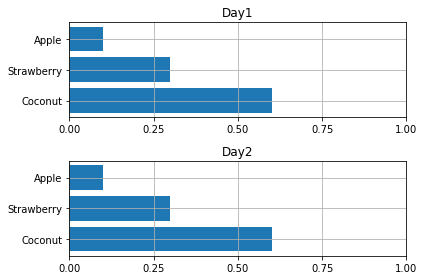

In [5]:
node_names = ['Day1', 'Day2']
num_nodes = len(node_names)
pd_df_list = [pd_df, pd_df]

def single_pd(ax, node_name, pd_df):
        y_pos = np.arange(len(pd_df.index)) +.5
        plt.sca(ax)
        plt.yticks(y_pos, pd_df.index)
        ax.invert_yaxis()
        
        ax.set_xticks([0, .25, .5, .75, 1])
        ax.set_xlim(0, 1)
        
        ax.grid(True)
        ax.set_title(node_name)
        ax.barh(y_pos, pd_df.values, align='center')
plt.close('all')
fig, ax_list = plt.subplots(nrows=num_nodes, ncols=1)
for k, vtx in enumerate(node_names):
    single_pd(ax_list[k], vtx, pd_df_list[k])
plt.tight_layout()
plt.show()

Plot multiple density matrices

[[ 0.  1.  2.]
 [ 0.  1.  2.]
 [ 0.  1.  2.]]
[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]]
[[ 0.  1.  2.]
 [ 0.  1.  2.]
 [ 0.  1.  2.]]
[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]]


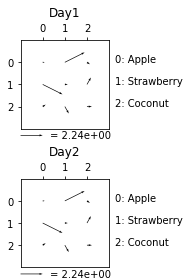

In [11]:
node_names = ['Day1', 'Day2']
num_nodes = len(node_names)
rho_df_list = [rho_df, rho_df]

def single_rho(ax, node_name, rho_df):
    states = rho_df.index
    num_sts = len(states)
    x = np.linspace(0, num_sts-1, num_sts)
    y = x
    xx, yy = np.meshgrid(x, y)
    print(xx)
    print(yy)
    
    ax.set_xlim(-1, num_sts)
    ax.set_xticks(np.arange(0, num_sts))
    ax.xaxis.tick_top()
    
    ax.set_ylim(-1, num_sts)
    ax.set_yticks(np.arange(0, num_sts))
    ax.invert_yaxis()
    
    ax.set_aspect('equal', adjustable='box')
    ax.set_title(node_name, y=1.2)

    for k, nom in enumerate(states):
        ax.annotate(str(k) + ': ' + nom, xy=(num_sts+.25, k), annotation_clip=False)
    
    max_mag = np.max(np.absolute(rho_df.values))
    q = ax.quiver(xx, yy, rho_df.values.real, rho_df.values.imag, scale=max_mag, units='x')
    qk = plt.quiverkey(q, 0, num_sts +.3 , max_mag, 
                       '= {:.2e}'.format(max_mag), labelpos='E', coordinates='data')
    
plt.close('all')
fig, ax_list = plt.subplots(nrows=num_nodes, ncols=1)
for k, vtx in enumerate(node_names):
    single_rho(ax_list[k], vtx, rho_df_list[k])
plt.tight_layout()
plt.show()